In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/plant_disease_dataset/Plant disease detection  Dataset',
    shuffle = True,
    image_size = (256,256),
    batch_size = 8
)

Found 410 files belonging to 2 classes.


In [19]:
class_names = dataset.class_names
class_names

['Diseased ', 'Healthy']

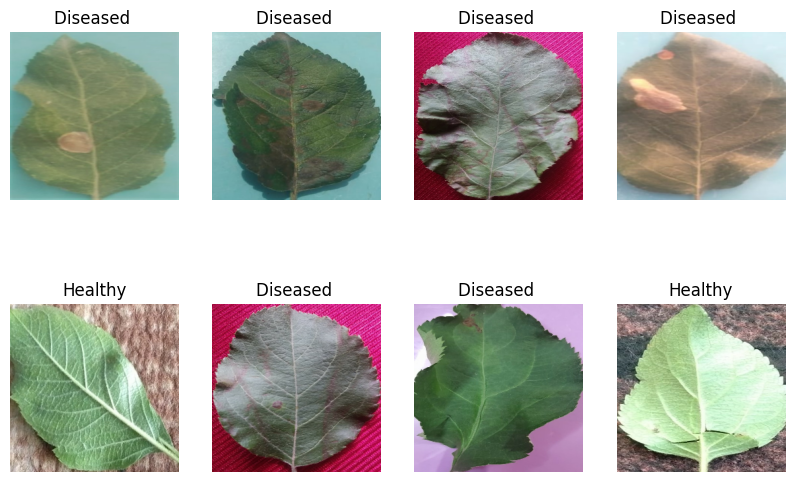

In [26]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

52

In [8]:
train_ds = dataset.take(41)
test_ds =dataset.skip(41)

In [9]:
val_ds = test_ds.take(5)
test_ds = test_ds.skip(5)

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters =32,kernel_size =(3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters =32,kernel_size =(3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')

])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(train_ds,epochs = 50,batch_size = 8,validation_data=val_ds)

Epoch 1/50
41/41 [==============================] - 19s 444ms/step - loss: 0.9197 - accuracy: 0.8872 - val_loss: 0.3779 - val_accuracy: 0.8500
Epoch 2/50
41/41 [==============================] - 17s 420ms/step - loss: 0.1949 - accuracy: 0.8994 - val_loss: 0.1296 - val_accuracy: 0.9500
Epoch 3/50
41/41 [==============================] - 20s 478ms/step - loss: 0.1549 - accuracy: 0.9207 - val_loss: 0.1056 - val_accuracy: 0.9500
Epoch 4/50
41/41 [==============================] - 17s 422ms/step - loss: 0.1389 - accuracy: 0.9360 - val_loss: 0.2725 - val_accuracy: 0.9000
Epoch 5/50
41/41 [==============================] - 17s 419ms/step - loss: 0.1270 - accuracy: 0.9390 - val_loss: 0.1966 - val_accuracy: 0.9250
Epoch 6/50
41/41 [==============================] - 19s 442ms/step - loss: 0.2305 - accuracy: 0.9299 - val_loss: 0.3043 - val_accuracy: 0.9000
Epoch 7/50
41/41 [==============================] - 17s 420ms/step - loss: 0.1423 - accuracy: 0.9360 - val_loss: 0.2784 - val_accuracy: 0.9250

In [51]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 3s 127ms/step - loss: 0.1387 - accuracy: 0.9286


In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_accuracy']


Text(0.5, 1.0, 'Training and Validation loss')

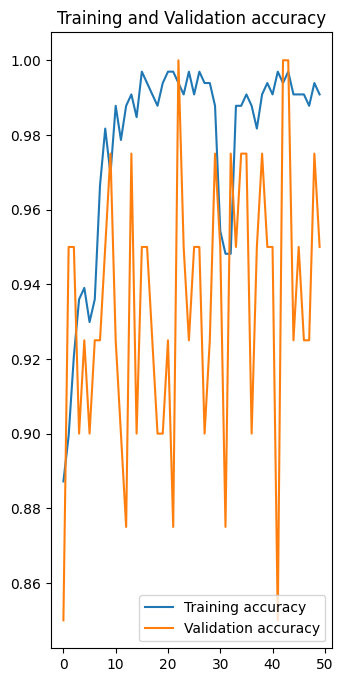

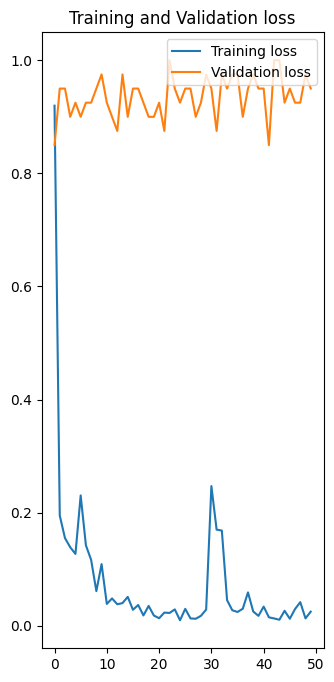

In [57]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label = "Training accuracy")
plt.plot(range(50),val_acc,label = "Validation accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),loss,label = "Training loss")
plt.plot(range(50),val_loss,label = "Validation loss")
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

1/1 [==============================] - 0s 148ms/step


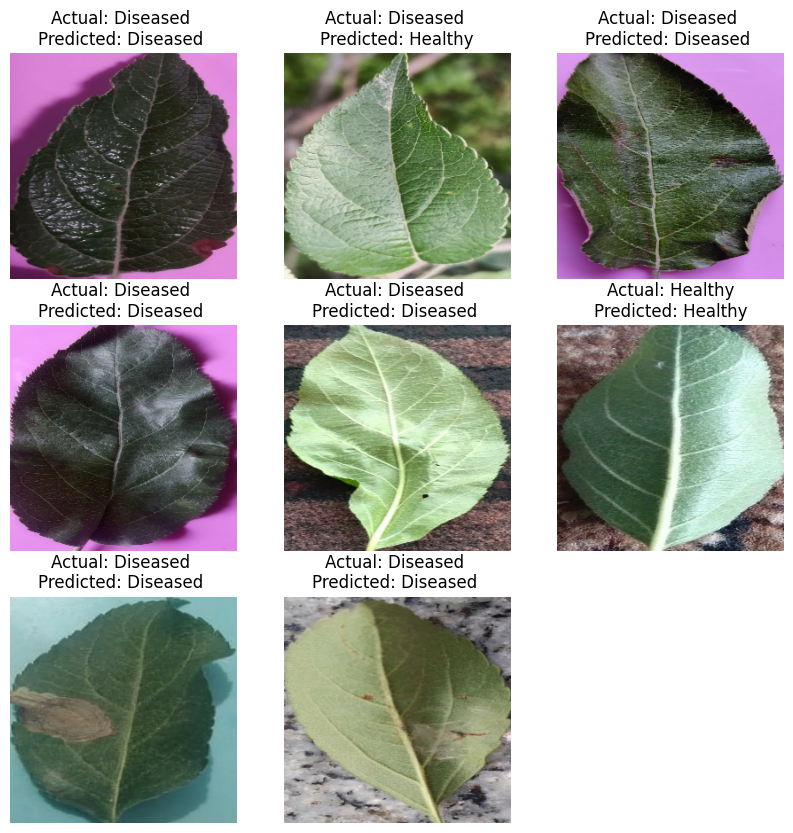

In [55]:
plt.figure(figsize=(10, 10))

for images_batch, labels_batch in test_ds.take(1):
    batch_prediction = model.predict(images_batch)
    num_images = min(8, images_batch.shape[0])

    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        image = images_batch[i].numpy().astype('uint8')
        true_label = labels_batch[i].numpy()
        predicted_label = np.argmax(batch_prediction[i])

        plt.imshow(image)
        plt.title(f"Actual: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}")
        plt.axis("off")

plt.show()


In [37]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')

])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history2 = model2.fit(train_ds,epochs = 50,batch_size = 8,validation_data=val_ds)

Epoch 1/50
41/41 [==============================] - 9s 197ms/step - loss: 1851.7225 - accuracy: 0.8323 - val_loss: 903.7711 - val_accuracy: 0.8250
Epoch 2/50
41/41 [==============================] - 9s 204ms/step - loss: 349.0055 - accuracy: 0.8750 - val_loss: 921.7682 - val_accuracy: 0.7500
Epoch 3/50
41/41 [==============================] - 7s 168ms/step - loss: 183.2328 - accuracy: 0.8994 - val_loss: 256.0523 - val_accuracy: 0.8500
Epoch 4/50
41/41 [==============================] - 8s 195ms/step - loss: 519.1208 - accuracy: 0.8811 - val_loss: 136.7296 - val_accuracy: 0.9000
Epoch 5/50
41/41 [==============================] - 8s 191ms/step - loss: 123.6226 - accuracy: 0.9207 - val_loss: 157.7408 - val_accuracy: 0.9500
Epoch 6/50
41/41 [==============================] - 7s 169ms/step - loss: 151.8624 - accuracy: 0.9238 - val_loss: 187.9358 - val_accuracy: 0.9500
Epoch 7/50
41/41 [==============================] - 7s 170ms/step - loss: 200.8073 - accuracy: 0.9146 - val_loss: 8.3256 - 

In [38]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation loss')

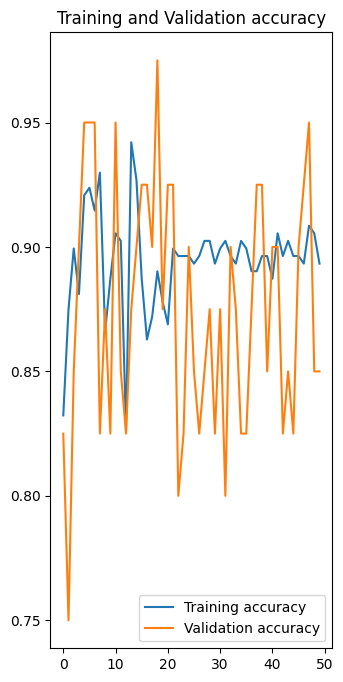

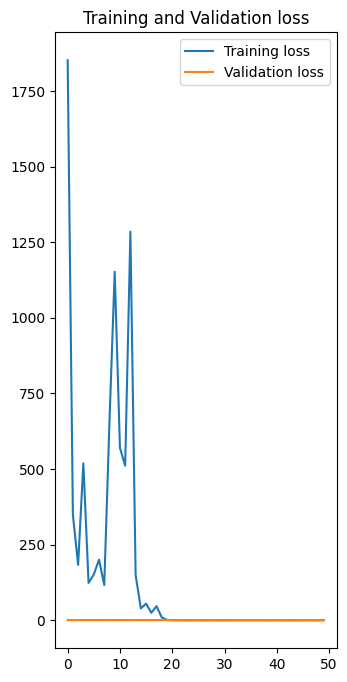

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc2,label = "Training accuracy")
plt.plot(range(50),val_acc2,label = "Validation accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),loss2,label = "Training loss")
plt.plot(range(50),val_loss2,label = "Validation loss")
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

In [40]:
model2.evaluate(test_ds)

6/6 [==============================] - 1s 10ms/step - loss: 5.8377 - accuracy: 0.8571


[5.837674617767334, 0.8571428656578064]

Text(0.5, 1.0, 'Training accuracy of models')

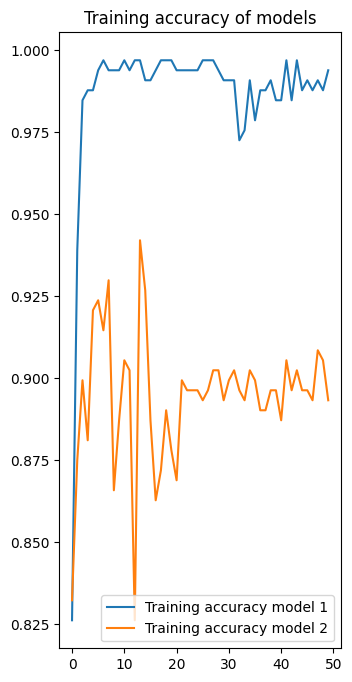

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label = "Training accuracy model 1")
plt.plot(range(50),acc2,label = "Training accuracy model 2")
plt.legend(loc='lower right')
plt.title('Training accuracy of models')

Text(0.5, 1.0, 'Validation accuracy of models')

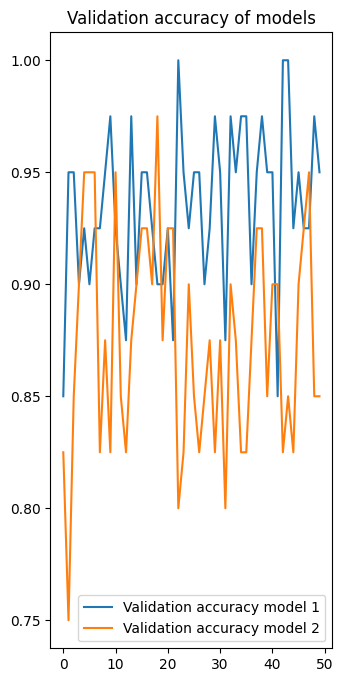

In [59]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),val_acc,label = "Validation accuracy model 1")
plt.plot(range(50),val_acc2,label = "Validation accuracy model 2")
plt.legend(loc='lower right')
plt.title('Validation accuracy of models')

1/1 [==============================] - 0s 23ms/step


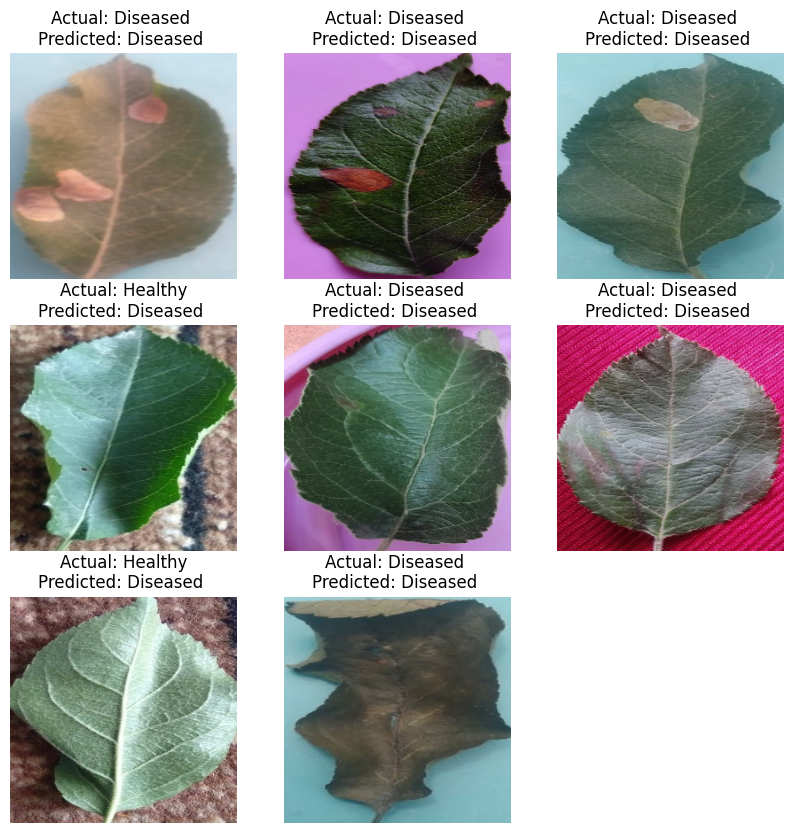

In [60]:
plt.figure(figsize=(10, 10))

for images_batch, labels_batch in test_ds.take(1):
    batch_prediction = model2.predict(images_batch)
    num_images = min(8, images_batch.shape[0])

    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        image = images_batch[i].numpy().astype('uint8')
        true_label = labels_batch[i].numpy()
        predicted_label = np.argmax(batch_prediction[i])

        plt.imshow(image)
        plt.title(f"Actual: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}")
        plt.axis("off")

plt.show()
